In [1]:
# 过拟合和欠拟合
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/home/haormj/Develop/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [17]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

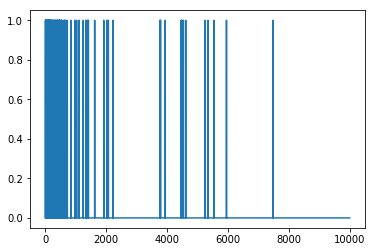

In [20]:
plt.plot(train_data[0])

In [23]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [24]:
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 6s - loss: 0.5036 - acc: 0.8047 - binary_crossentropy: 0.5036 - val_loss: 0.3492 - val_acc: 0.8714 - val_binary_crossentropy: 0.3492
Epoch 2/20
 - 4s - loss: 0.2584 - acc: 0.9105 - binary_crossentropy: 0.2584 - val_loss: 0.2852 - val_acc: 0.8872 - val_binary_crossentropy: 0.2852
Epoch 3/20
 - 4s - loss: 0.1855 - acc: 0.9351 - binary_crossentropy: 0.1855 - val_loss: 0.2900 - val_acc: 0.8840 - val_binary_crossentropy: 0.2900
Epoch 4/20
 - 4s - loss: 0.1499 - acc: 0.9477 - binary_crossentropy: 0.1499 - val_loss: 0.3193 - val_acc: 0.8757 - val_binary_crossentropy: 0.3193
Epoch 5/20
 - 4s - loss: 0.1232 - acc: 0.9591 - binary_crossentropy: 0.1232 - val_loss: 0.3339 - val_acc: 0.8744 - val_binary_crossentropy: 0.3339
Epoch 6/20
 - 4s - loss: 0.1024 - acc: 0.9684 - binary_crossentropy: 0.1024 - val_loss: 0.3630 - val_acc: 0.8715 - val_binary_crossentropy: 0.3630
Epoch 7/20
 - 4s - l

In [26]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
smaller_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [27]:
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6178 - acc: 0.6562 - binary_crossentropy: 0.6178 - val_loss: 0.5627 - val_acc: 0.7143 - val_binary_crossentropy: 0.5627
Epoch 2/20
 - 6s - loss: 0.5130 - acc: 0.8126 - binary_crossentropy: 0.5130 - val_loss: 0.5060 - val_acc: 0.8032 - val_binary_crossentropy: 0.5060
Epoch 3/20
 - 6s - loss: 0.4599 - acc: 0.8716 - binary_crossentropy: 0.4599 - val_loss: 0.4779 - val_acc: 0.8286 - val_binary_crossentropy: 0.4779
Epoch 4/20
 - 6s - loss: 0.4224 - acc: 0.9026 - binary_crossentropy: 0.4224 - val_loss: 0.4516 - val_acc: 0.8605 - val_binary_crossentropy: 0.4516
Epoch 5/20
 - 6s - loss: 0.3891 - acc: 0.9252 - binary_crossentropy: 0.3891 - val_loss: 0.4439 - val_acc: 0.8588 - val_binary_crossentropy: 0.4439
Epoch 6/20
 - 6s - loss: 0.3620 - acc: 0.9395 - binary_crossentropy: 0.3620 - val_loss: 0.4277 - val_acc: 0.8772 - val_binary_crossentropy: 0.4277
Epoch 7/20
 - 6s - loss: 0.3394 - acc: 0.9514 - binary_crossentropy:

In [28]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

bigger_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [29]:
bigger_history = bigger_model.fit(
    train_data,
    test_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 23s - loss: 0.6952 - acc: 0.5027 - binary_crossentropy: 0.6952 - val_loss: 0.6959 - val_acc: 0.4740 - val_binary_crossentropy: 0.6959
Epoch 2/20
 - 23s - loss: 0.6160 - acc: 0.6763 - binary_crossentropy: 0.6160 - val_loss: 0.7803 - val_acc: 0.4937 - val_binary_crossentropy: 0.7803
Epoch 3/20
 - 25s - loss: 0.2879 - acc: 0.8910 - binary_crossentropy: 0.2879 - val_loss: 1.0941 - val_acc: 0.5031 - val_binary_crossentropy: 1.0941
Epoch 4/20
 - 27s - loss: 0.0507 - acc: 0.9915 - binary_crossentropy: 0.0507 - val_loss: 1.5037 - val_acc: 0.4849 - val_binary_crossentropy: 1.5037
Epoch 5/20
 - 27s - loss: 0.0233 - acc: 0.9967 - binary_crossentropy: 0.0233 - val_loss: 1.5908 - val_acc: 0.4895 - val_binary_crossentropy: 1.5908
Epoch 6/20
 - 26s - loss: 0.0162 - acc: 0.9966 - binary_crossentropy: 0.0162 - val_loss: 1.6715 - val_acc: 0.5006 - val_binary_crossentropy: 1.6715
Epoch 7/20
 - 27s - loss: 0.0115 - acc: 0.9970 - binary_crosse

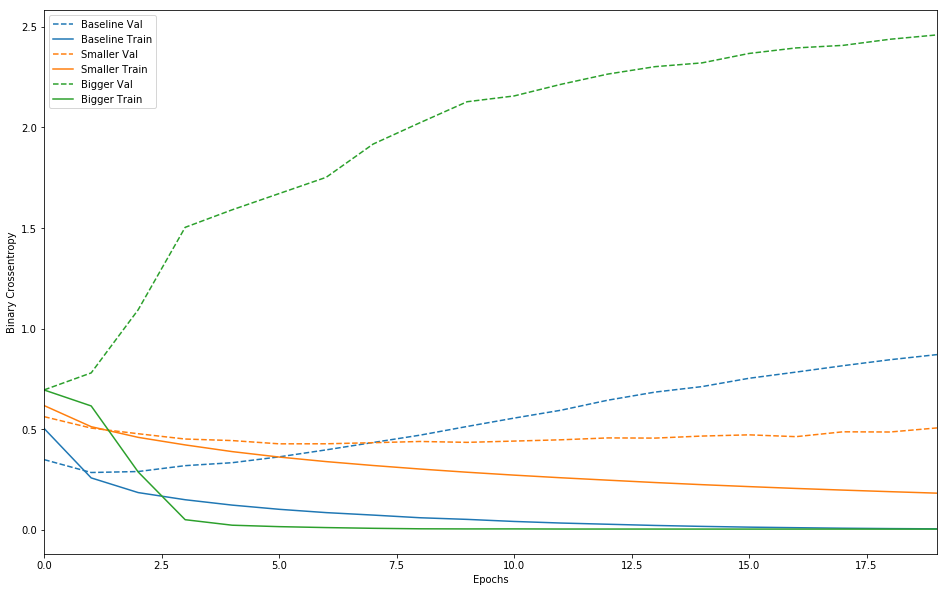

In [34]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(
            history.epoch, 
            history.history['val_'+key],
            '--',
            label=name.title()+' Val'
        )
        plt.plot(
            history.epoch,
            history.history[key],
            color=val[0].get_color(),
            label=name.title()+' Train'
        )
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])

                
plot_history([
    ('baseline', baseline_history),
    ('smaller', smaller_history),
    ('bigger', bigger_history)
])                

In [38]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
l2_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)
l2_model_history = l2_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5321 - acc: 0.8032 - binary_crossentropy: 0.4922 - val_loss: 0.3827 - val_acc: 0.8771 - val_binary_crossentropy: 0.3418
Epoch 2/20
 - 5s - loss: 0.3053 - acc: 0.9073 - binary_crossentropy: 0.2602 - val_loss: 0.3337 - val_acc: 0.8880 - val_binary_crossentropy: 0.2855
Epoch 3/20
 - 5s - loss: 0.2506 - acc: 0.9298 - binary_crossentropy: 0.2000 - val_loss: 0.3356 - val_acc: 0.8860 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 4s - loss: 0.2269 - acc: 0.9398 - binary_crossentropy: 0.1730 - val_loss: 0.3518 - val_acc: 0.8799 - val_binary_crossentropy: 0.2967
Epoch 5/20
 - 4s - loss: 0.2108 - acc: 0.9480 - binary_crossentropy: 0.1548 - val_loss: 0.3637 - val_acc: 0.8776 - val_binary_crossentropy: 0.3068
Epoch 6/20
 - 4s - loss: 0.1985 - acc: 0.9533 - binary_crossentropy: 0.1406 - val_loss: 0.3759 - val_acc: 0.8762 - val_binary_crossentropy: 0.3175
Epoch 7/20
 - 4s - loss: 0.1906 - acc: 0.9561 - binary_crossentropy:

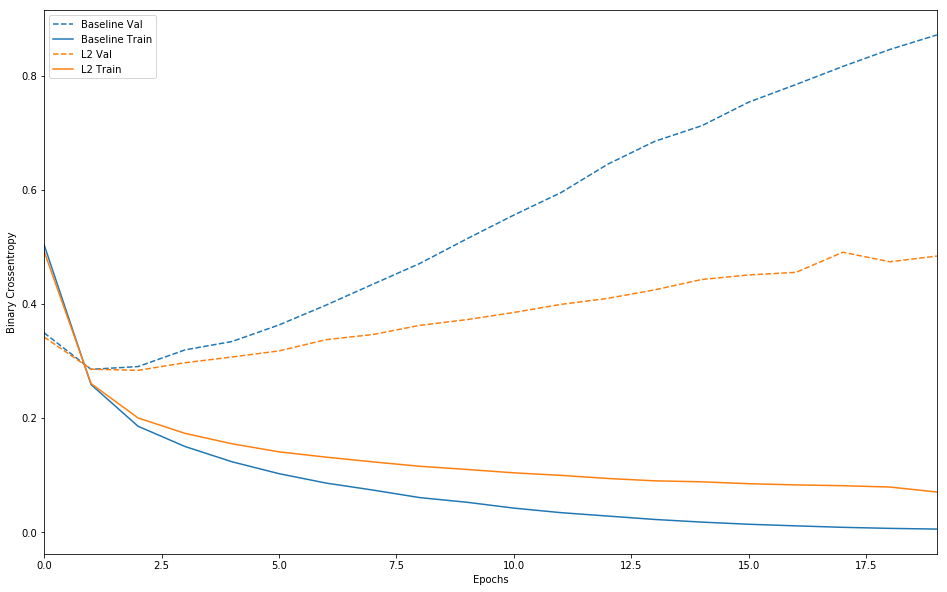

In [39]:
plot_history([
    ('baseline', baseline_history),
    ('l2', l2_model_history)
])

In [41]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
dpt_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy']
)
dpt_model_history = dpt_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6033 - acc: 0.6563 - binary_crossentropy: 0.6033 - val_loss: 0.4302 - val_acc: 0.8601 - val_binary_crossentropy: 0.4302
Epoch 2/20
 - 4s - loss: 0.4257 - acc: 0.8096 - binary_crossentropy: 0.4257 - val_loss: 0.3146 - val_acc: 0.8833 - val_binary_crossentropy: 0.3146
Epoch 3/20
 - 4s - loss: 0.3384 - acc: 0.8631 - binary_crossentropy: 0.3384 - val_loss: 0.2922 - val_acc: 0.8824 - val_binary_crossentropy: 0.2922
Epoch 4/20
 - 4s - loss: 0.2838 - acc: 0.8956 - binary_crossentropy: 0.2838 - val_loss: 0.2737 - val_acc: 0.8874 - val_binary_crossentropy: 0.2737
Epoch 5/20
 - 5s - loss: 0.2407 - acc: 0.9156 - binary_crossentropy: 0.2407 - val_loss: 0.2799 - val_acc: 0.8859 - val_binary_crossentropy: 0.2799
Epoch 6/20
 - 4s - loss: 0.2097 - acc: 0.9291 - binary_crossentropy: 0.2097 - val_loss: 0.2897 - val_acc: 0.8835 - val_binary_crossentropy: 0.2897
Epoch 7/20
 - 4s - loss: 0.1823 - acc: 0.9390 - binary_crossentropy:

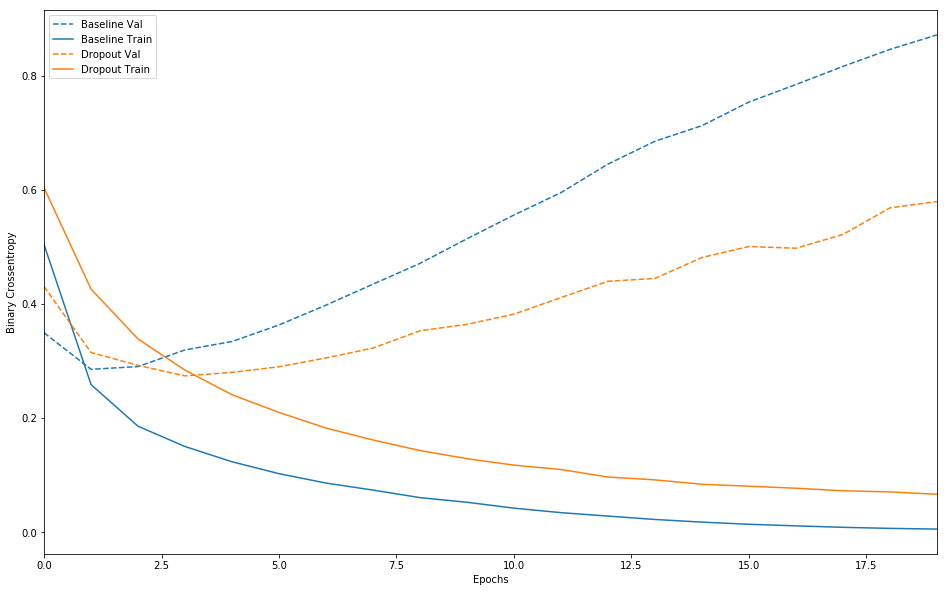

In [42]:
plot_history([
    ('baseline', baseline_history),
    ('dropout', dpt_model_history)
])